In [12]:
### import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from utils import run_scenarios, run_scenarios_waning, plot_scenarios

# Comparing With and Without Waning

Let us now compare the results from running the modified SEIR model with and without waning protection of the vaccines. We compared the difference percentage reduction that was calculated 60 days after vaccination started, and the plots are shown below. 

## Without Waning Immunity

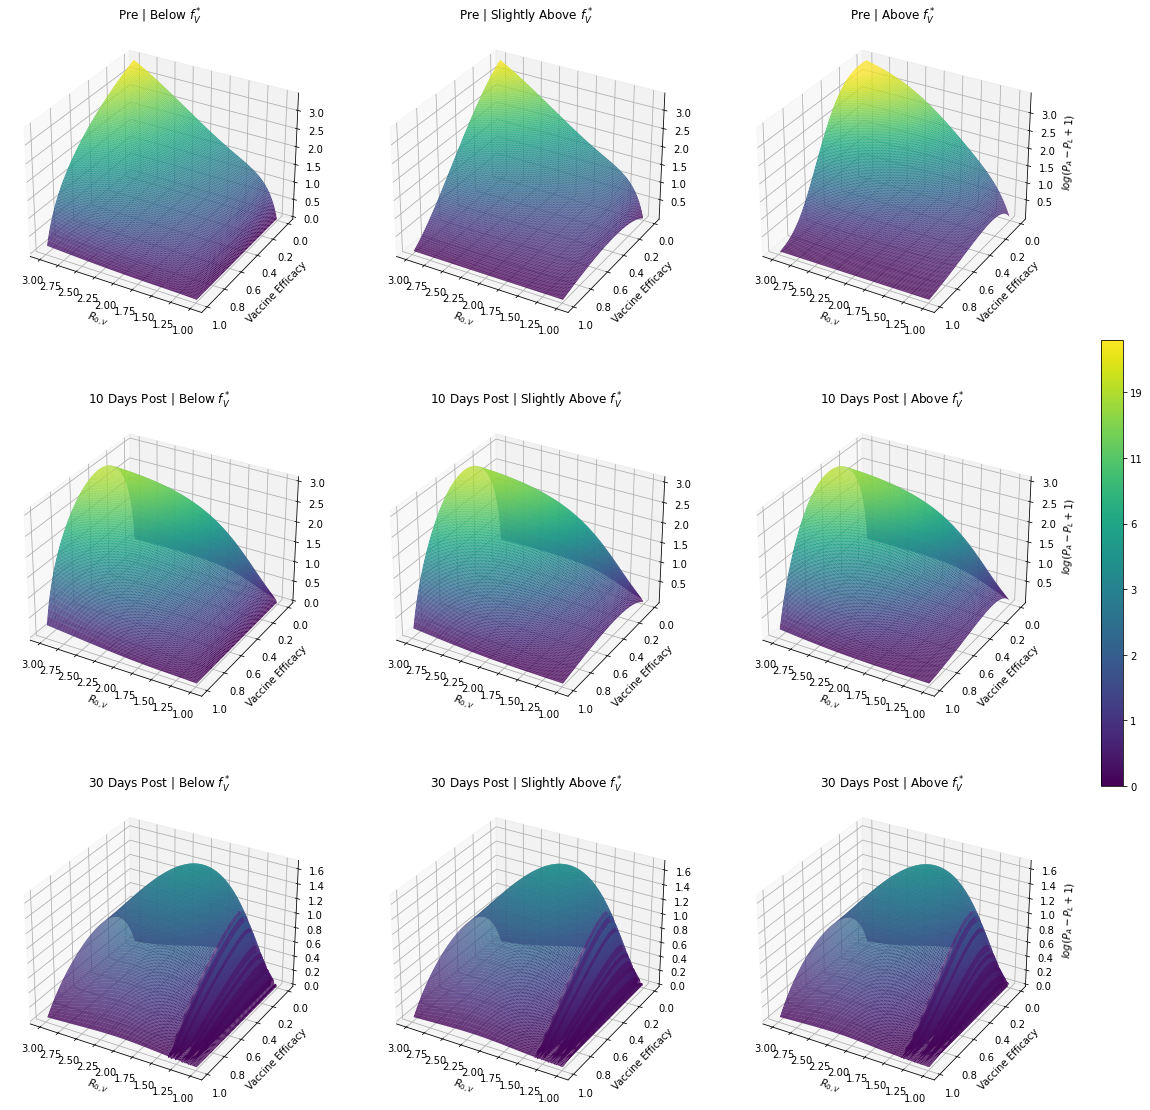

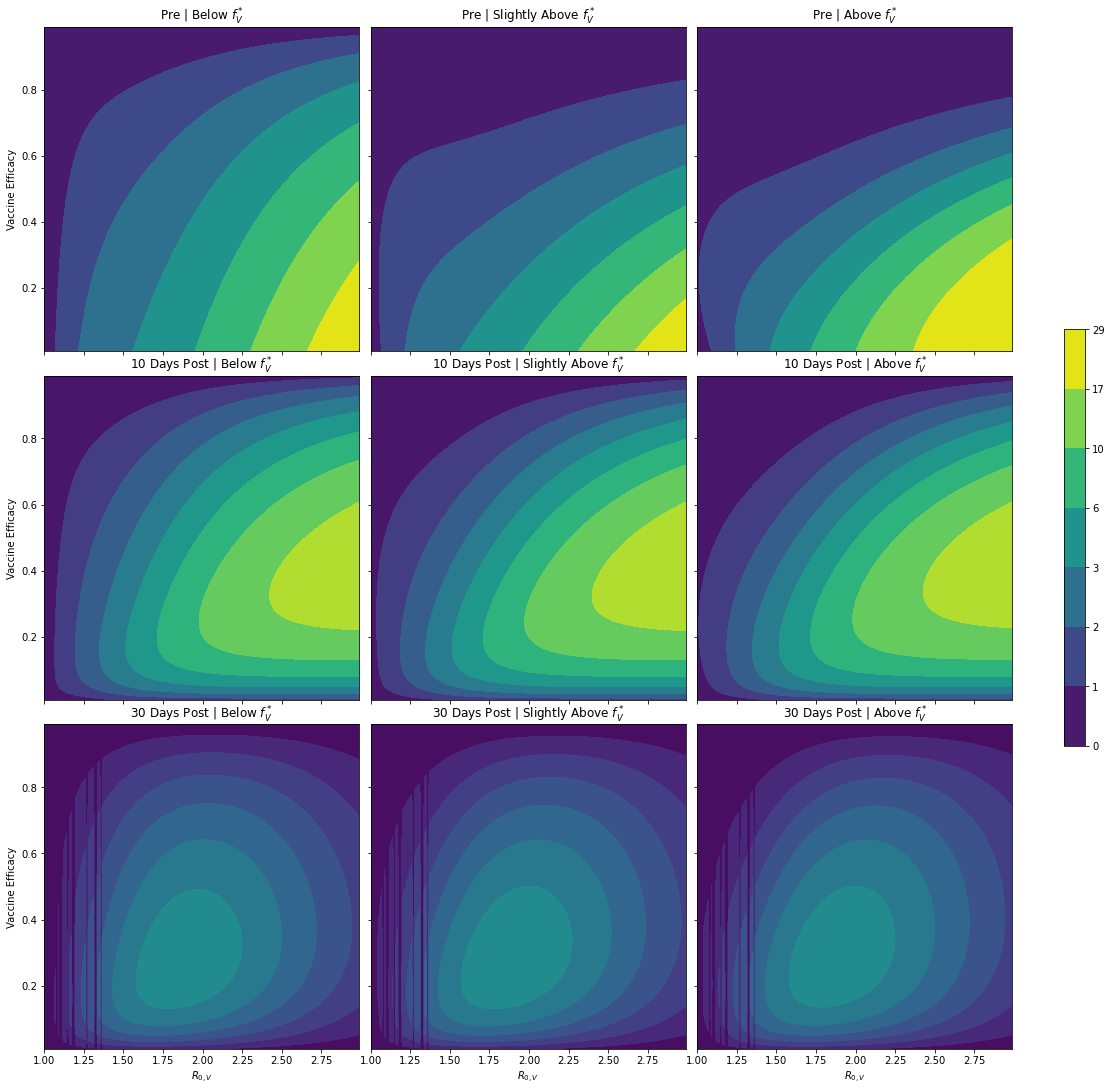

In [3]:
# set parameters
sigma = 1/4; gamma = 1/4
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = [s0, e0, i0, r0]
r0s = np.arange(1.0, 3.0, 0.01); epss = np.arange(0.01, 1.0, 0.01)

t1 = np.linspace(0, 60, 61); t2 = np.linspace(0, 70, 71); t3 = np.linspace(0, 90, 91)
pre_df = run_scenarios(y0, t1, r0s, sigma, gamma, epss, scenario='pre')
post10_df = run_scenarios(y0, t2, r0s, sigma, gamma, epss, scenario='post10')
post30_df = run_scenarios(y0, t3, r0s, sigma, gamma, epss, scenario='post30')

fig_3d = plot_scenarios(pre_df, post10_df, post30_df, dim=3)
fig_2d = plot_scenarios(pre_df, post10_df, post30_df, dim=2)

fig_3d.show()
fig_2d.show() 

## With Waning Immunity

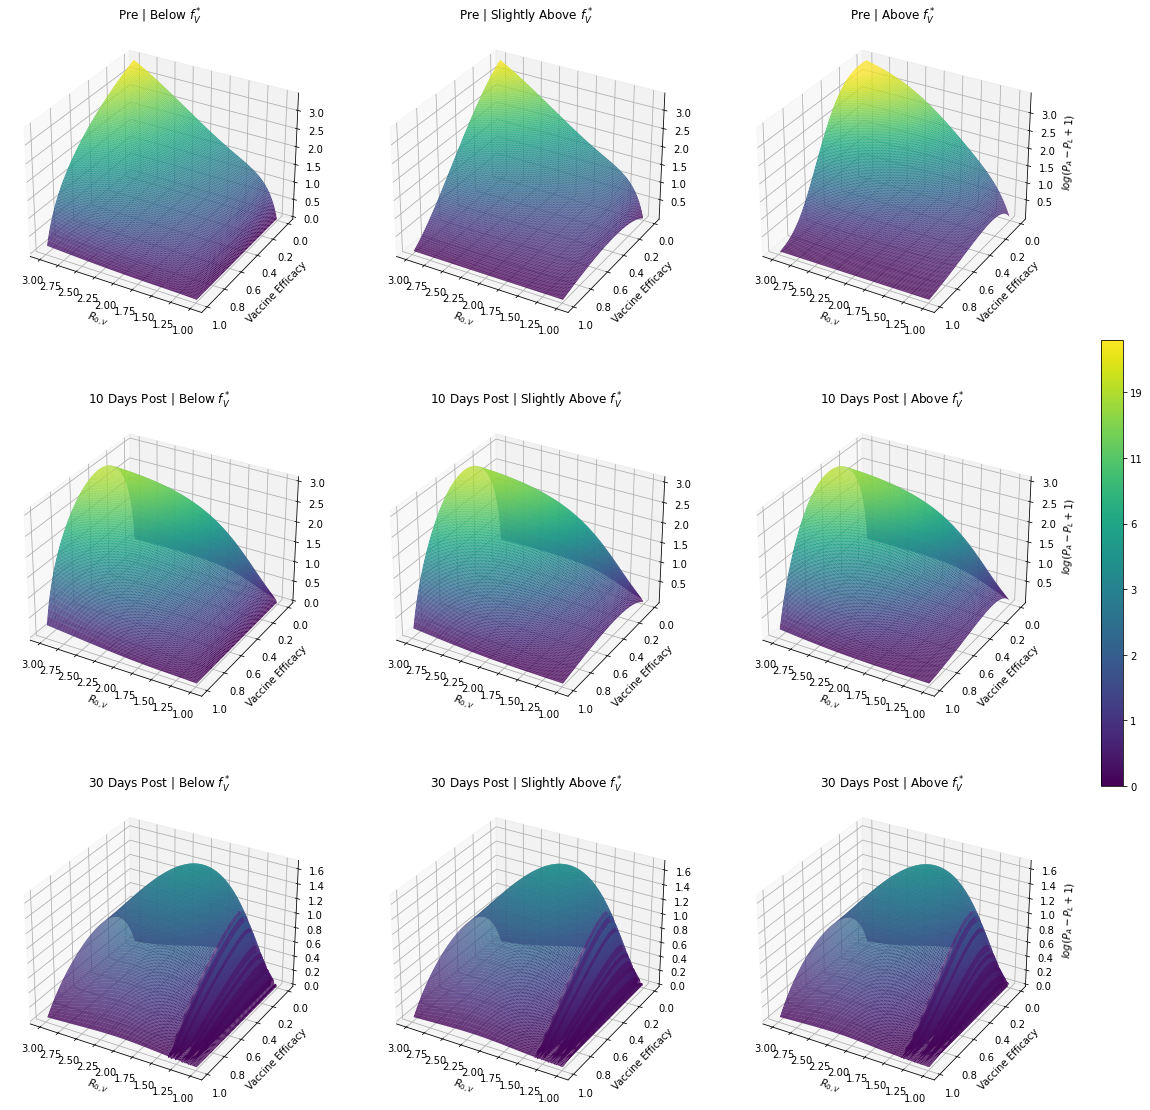

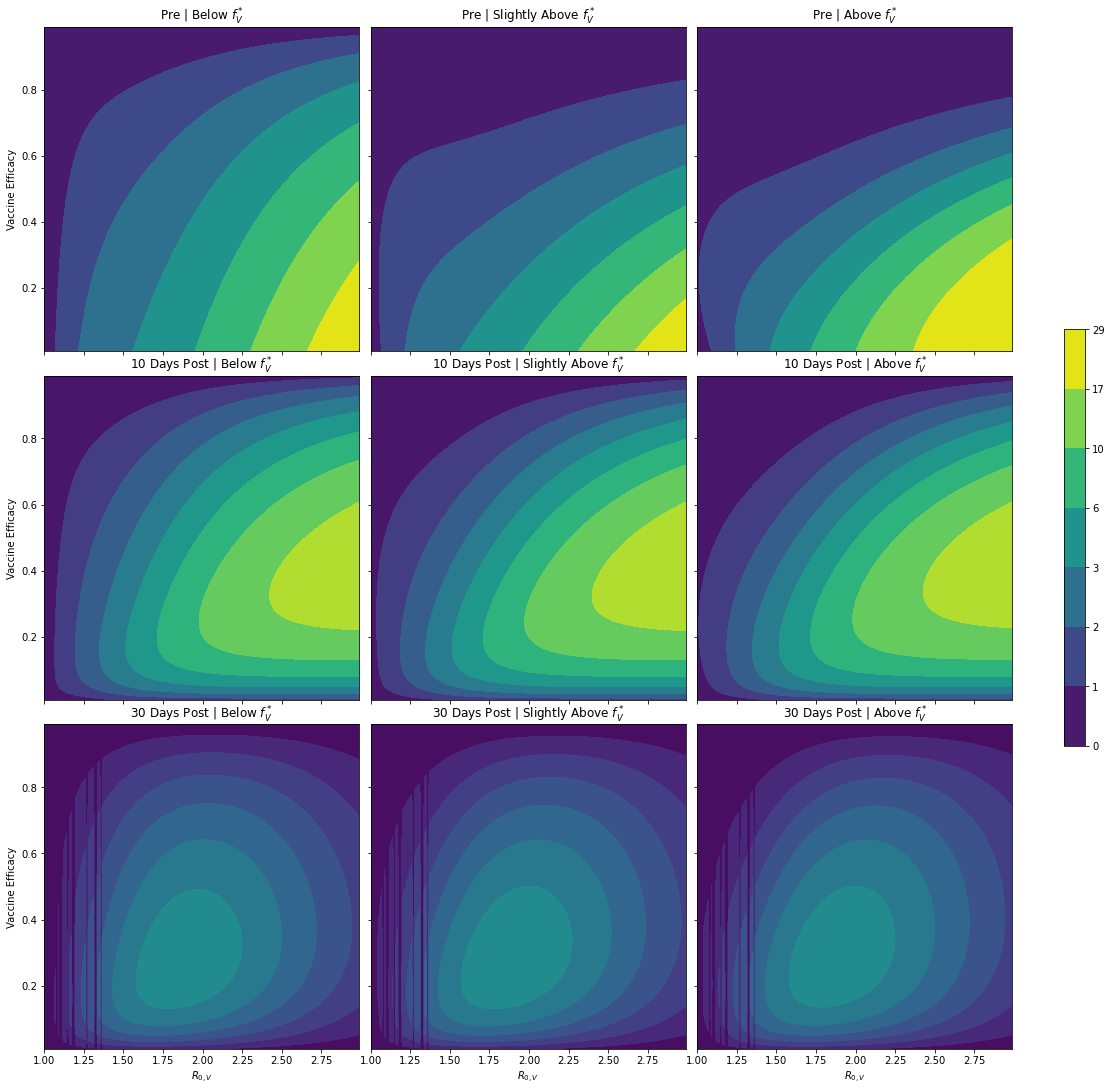

In [4]:
# set parameters
sigma = 1/4; gamma = 1/4; w = 0.005
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; y0 = [s0, e0, i0, r0]
r0s = np.arange(1.0, 3.0, 0.01); epss = np.arange(0.01, 1.0, 0.01)

t1 = np.linspace(0, 60, 61); t2 = np.linspace(0, 70, 71); t3 = np.linspace(0, 90, 91)
pre_df_waning = run_scenarios_waning(y0, t1, r0s, sigma, gamma, epss, w, scenario='pre')
post10_df_waning = run_scenarios_waning(y0, t2, r0s, sigma, gamma, epss, w, scenario='post10')
post30_df_waning = run_scenarios_waning(y0, t3, r0s, sigma, gamma, epss, w, scenario='post30')

fig_3d_waning = plot_scenarios(pre_df, post10_df, post30_df, dim=3)
fig_2d_waning = plot_scenarios(pre_df, post10_df, post30_df, dim=2)

fig_3d_waning.show()
fig_2d_waning.show() 

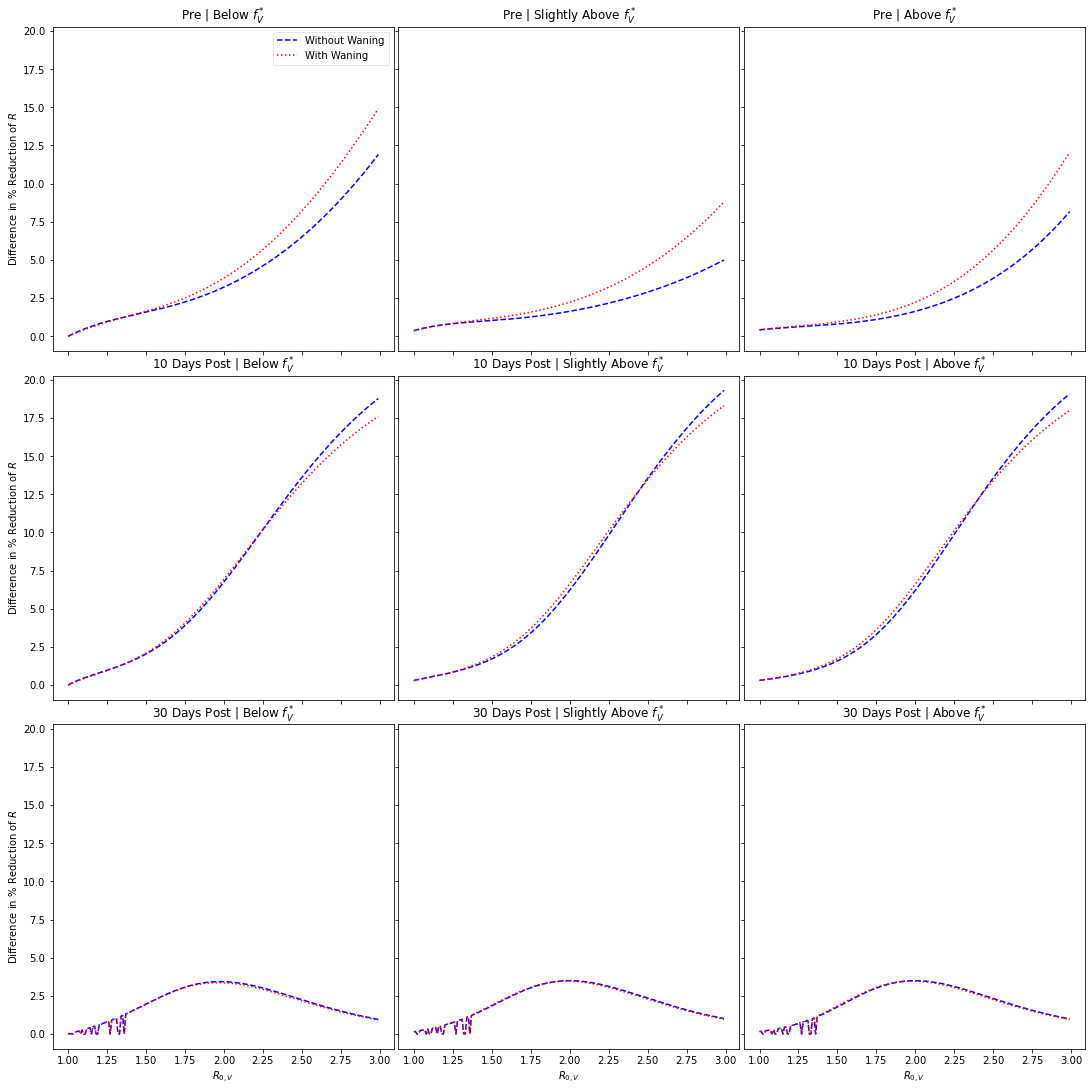

In [17]:
plot_r0 = np.arange(1.0, 3.0, 0.01); 

belows = np.zeros((6, len(plot_r0)))
slaboves = np.zeros((6, len(plot_r0)))
aboves = np.zeros((6, len(plot_r0)))

for i, df in enumerate([pre_df, post10_df, post30_df, pre_df_waning, post10_df_waning, post30_df_waning]):
    df_eps = df[df['VE'] == 0.5]
    below_df_eps = df_eps[df_eps['Vax Coverage'] == 'Below fc']
    slabove_df_eps = df_eps[df_eps['Vax Coverage'] == 'Slightly Above fc']
    above_df_eps = df_eps[df_eps['Vax Coverage'] == 'Above fc']

    below = np.nan_to_num(np.reshape(below_df_eps['Diff'].to_numpy(), np.shape(plot_r0)))    
    slabove = np.nan_to_num(np.reshape(slabove_df_eps['Diff'].to_numpy(), np.shape(plot_r0)))
    above = np.nan_to_num(np.reshape(above_df_eps['Diff'].to_numpy(), np.shape(plot_r0)))

    belows[i] = below
    slaboves[i] = slabove
    aboves[i] = above

fig, axes = plt.subplots(3,3, facecolor='w', figsize=(15,15), sharex=True, sharey=True, \
    gridspec_kw=dict(width_ratios=[1,1,1]))
# Pre-transmission 
axes[0,0].plot(plot_r0, belows[0], 'b--', label='Without Waning')
axes[0,0].plot(plot_r0, belows[3], 'r:', label='With Waning')
axes[0,0].set_title('Pre | Below $f^*_V$')
axes[0,0].set_ylabel('Difference in % Reduction of $R$')
#axes[0,0].set_ylim([-0.2, 17.7])
legend = axes[0,0].legend(); legend.get_frame().set_alpha(0.5)

#palette = {'b--': 'Without Waning', 'r:':}
#patches = [Patch(color=k, label=v) for k,v in palette.items()]
    #axes[1].legend(handles=patches, loc='right', bbox_to_anchor=(1.1, 0.2))

axes[0,1].plot(plot_r0, slaboves[0], 'b--')
axes[0,1].plot(plot_r0, slaboves[3], 'r:')
axes[0,1].set_title('Pre | Slightly Above $f^*_V$')

#ax3 = fig.add_subplot(133)
axes[0,2].plot(plot_r0, aboves[0], 'b--')
axes[0,2].plot(plot_r0, aboves[3], 'r:')
axes[0,2].set_title('Pre | Above $f^*_V$')

# 10 days post-transmission
axes[1,0].plot(plot_r0, belows[1], 'b--')
axes[1,0].plot(plot_r0, belows[4], 'r:')
#axes[1,0].set_ylim([-0.2, 17.7])
axes[1,0].set_title('10 Days Post | Below $f^*_V$')
axes[1,0].set_ylabel('Difference in % Reduction of $R$')

axes[1,1].plot(plot_r0, slaboves[1], 'b--')
axes[1,1].plot(plot_r0, slaboves[4], 'r:')
axes[1,1].set_title('10 Days Post | Slightly Above $f^*_V$')

axes[1,2].plot(plot_r0, aboves[1], 'b--')
axes[1,2].plot(plot_r0, aboves[4], 'r:')
axes[1,2].set_title('10 Days Post | Above $f^*_V$')

# 30 days post-transmission
axes[2,0].plot(plot_r0, belows[2], 'b--')
axes[2,0].plot(plot_r0, belows[5], 'r:')
axes[2,0].set_title('30 Days Post | Below $f^*_V$')
axes[2,0].set_ylabel('Difference in % Reduction of $R$')
axes[2,0].set_xlabel('$R_{0,V}$')

axes[2,1].plot(plot_r0, slaboves[2], 'b--')
axes[2,1].plot(plot_r0, slaboves[5], 'r:')
axes[2,1].set_title('30 Days Post | Slightly Above $f^*_V$')
axes[2,1].set_xlabel('$R_{0,V}$')

axes[2,2].plot(plot_r0, aboves[2], 'b--')
axes[2,2].plot(plot_r0, aboves[5], 'r:')
axes[2,2].set_title('30 Days Post | Above $f^*_V$')
axes[2,2].set_xlabel('$R_{0,V}$')

fig.tight_layout(pad=0.1)